In [1]:
import numpy
import random
from matplotlib import pyplot as plt
import plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

def plot_simulation(df, name):
    fig = ff.create_gantt(df, colors={'green': 'rgb(0, 255, 100)'}, index_col="c", showgrid_x=True,
                          showgrid_y=True, title='Simulation', group_tasks=True)
    fig['layout']['xaxis']['rangeselector']['visible'] = False
    fig['layout']['xaxis']['rangeslider'] = dict(bgcolor='#E2E2E2')
    fig['layout']['xaxis']['type'] = 'linear'
    py.offline.iplot(fig, filename=name)

In [2]:
def simulate(t, N, node_list, verbose=True):
    log = []

    log.append("===============================================")
    log.append("============= Starting simulation =============")
    log.append("===============================================\n")
    log.append("t = "+str(t))
    log.append("N = "+str(N))
    log.append("probilities = "+str(node_list)+ "\n")

    retry = {1:"first retry",2:"second retry",3:"third retry"}

    n_packets_queued = 0
    hist_df = []

    simulation_hist = []
    fail_list = []
    dropped_list = []
    failed_packet_queued = []

    for x in range(N):
        simulation_hist.append([])
        fail_list.append([])
        dropped_list.append(0)
        failed_packet_queued.append(False)

    for current_t in range(t):

        log.append("============= timeslot "+str(current_t)+" - "+str(current_t + 1)+ " =============")

        for current_node in range(N):
            failed_packet_queued[current_node] = False


        # for each node, see if it is queing a packet to be send
        for current_node in range(N):
            node_prob = node_list[current_node]
            randfloat = random.random()

            # previousls a packet was failed
            if len(fail_list[current_node]):
                ts_num = fail_list[current_node][-1]
                if ts_num == current_t:
                    # que the previously failed packet
                    simulation_hist[current_node].append(1)
                    failed_packet_queued[current_node] = True
                    log.append("node "+str(current_node+1)+": Retransmitting packet, "+retry[len(fail_list[current_node])])
                    hist_df.append(dict(Task="node " + str(current_node+1),
                                        Start=current_t + 0.1, Finish=current_t+0.9,c='green'))
                else:
                    simulation_hist[current_node].append(0)


            # normal function
            else:
                if randfloat < node_prob:
                    # que a packet
                    simulation_hist[current_node].append(1)
                    log.append("node "+str(current_node+1)+": transmitting new packet")
                    n_packets_queued += 1
                    hist_df.append(dict(Task="node " + str(current_node+1),
                                        Start=current_t + 0.1, Finish=current_t+0.9,c='green'))
                else:
                    simulation_hist[current_node].append(0)

        # check if there is a collision
        num_packets = 0

        for current_node in range(N):
            num_packets += simulation_hist[current_node][-1]

        if num_packets > 1: # collision

            for current_node in range(N):

                if simulation_hist[current_node][-1]:

                    i = len(fail_list[current_node])

                    # already 3 collision, another collision drops the packet
                    if i >= 3:
                        fail_list[current_node] = []
                        dropped_list[current_node] += 1
                        log.append ("node "+str( current_node+1)+ ": collision, packet dropped")
                    else:
                        backoff_interval = random.randint(0,(2 ** i) - 1)
                        log.append ("node "+str( current_node+1) + ": collision, retry after "+str( backoff_interval) +" timeslots")
                        fail_list[current_node].append(backoff_interval + current_t + 1)

        # previously failed packet has been transfered
        for curr_node in range(N):
            if failed_packet_queued[curr_node] and num_packets <= 1:
                fail_list[curr_node] = []

        log.append ("")

    log.append("\n\n============= Simulation results =============")
    for curr_node in range(N):
        log.append ("node "+str(curr_node+1)+ " packets droped: "+str(dropped_list[curr_node]))

    n_packets_transfered = n_packets_queued - sum(dropped_list)

    if verbose:
        for line in log:
            print(line)

    return hist_df, n_packets_transfered

In [3]:
hist_df, _ = simulate(200, 3, [0.1, 0.1, 0.1])

============= Starting simulation =============

t = 200
N = 3
probilities = [0.1, 0.1, 0.1]

============= timeslot 0 - 1 =============
node 2: transmitting new packet

============= timeslot 1 - 2 =============
node 1: transmitting new packet

============= timeslot 2 - 3 =============

============= timeslot 3 - 4 =============

============= timeslot 4 - 5 =============
node 1: transmitting new packet
node 2: transmitting new packet
node 1: collision, retry after 0 timeslots
node 2: collision, retry after 0 timeslots

============= timeslot 5 - 6 =============
node 1: Retransmitting packet, first retry
node 2: Retransmitting packet, first retry
node 1: collision, retry after 0 timeslots
node 2: collision, retry after 1 timeslots

============= timeslot 6 - 7 =============
node 1: Retransmitting packet, second retry

============= timeslot 7 - 8 =============
node 2: Retransmitting packet, second retry

============= timeslot 8 - 9 =============

============= timeslot 9 - 10 ======

In [ ]:
plot_simulation(hist_df, "sim_t=200,N=3,p1=p2=p3=0.1")

In [5]:
hist_df, _ = simulate(200, 3, [0.3, 0.3, 0.3])

============= Starting simulation =============

t = 200
N = 3
probilities = [0.3, 0.3, 0.3]

============= timeslot 0 - 1 =============
node 1: transmitting new packet

============= timeslot 1 - 2 =============
node 3: transmitting new packet

============= timeslot 2 - 3 =============

============= timeslot 3 - 4 =============
node 2: transmitting new packet

============= timeslot 4 - 5 =============
node 3: transmitting new packet

============= timeslot 5 - 6 =============

============= timeslot 6 - 7 =============
node 2: transmitting new packet

============= timeslot 7 - 8 =============
node 1: transmitting new packet

============= timeslot 8 - 9 =============

============= timeslot 9 - 10 =============
node 3: transmitting new packet

============= timeslot 10 - 11 =============
node 1: transmitting new packet
node 2: transmitting new packet
node 1: collision, retry after 0 timeslots
node 2: collision, retry after 0 timeslots

============= timeslot 11 - 12 =============


In [ ]:
plot_simulation(hist_df, "sim_t=200,N=3,p1=p2=p3=0.3")

In [7]:
hist_df, _ = simulate(200, 3, [0.5, 0.5, 0.5])

============= Starting simulation =============

t = 200
N = 3
probilities = [0.5, 0.5, 0.5]

============= timeslot 0 - 1 =============
node 2: transmitting new packet
node 3: transmitting new packet
node 2: collision, retry after 0 timeslots
node 3: collision, retry after 0 timeslots

============= timeslot 1 - 2 =============
node 2: Retransmitting packet, first retry
node 3: Retransmitting packet, first retry
node 2: collision, retry after 1 timeslots
node 3: collision, retry after 1 timeslots

============= timeslot 2 - 3 =============

============= timeslot 3 - 4 =============
node 2: Retransmitting packet, second retry
node 3: Retransmitting packet, second retry
node 2: collision, retry after 1 timeslots
node 3: collision, retry after 1 timeslots

============= timeslot 4 - 5 =============
node 1: transmitting new packet

============= timeslot 5 - 6 =============
node 1: transmitting new packet
node 2: Retransmitting packet, third retry
node 3: Retransmitting packet, third ret

In [ ]:
plot_simulation(hist_df, "sim_t=200,N=3,p1=p2=p3=0.5")

In [9]:
hist_df, _ = simulate(200, 3, [1, 0.0, 0.0])

============= Starting simulation =============

t = 200
N = 3
probilities = [1, 0.0, 0.0]

============= timeslot 0 - 1 =============
node 1: transmitting new packet

============= timeslot 1 - 2 =============
node 1: transmitting new packet

============= timeslot 2 - 3 =============
node 1: transmitting new packet

============= timeslot 3 - 4 =============
node 1: transmitting new packet

============= timeslot 4 - 5 =============
node 1: transmitting new packet

============= timeslot 5 - 6 =============
node 1: transmitting new packet

============= timeslot 6 - 7 =============
node 1: transmitting new packet

============= timeslot 7 - 8 =============
node 1: transmitting new packet

============= timeslot 8 - 9 =============
node 1: transmitting new packet

============= timeslot 9 - 10 =============
node 1: transmitting new packet

============= timeslot 10 - 11 =============
node 1: transmitting new packet

============= timeslot 11 - 12 =============
node 1: transmitting new

In [ ]:
plot_simulation(hist_df, "sim_t=200,N=3,p1=1,p2=p3=0")

## XY plots which show the achieved user data throughput depending on the queue probability

In [11]:
plots_data = {}

for N in [2, 5, 10]:    
    
    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = []
    
    for p in x:
        _ , packets_transfered = simulate(1000, N, N * [p], False)
        p_t_per_node = packets_transfered / N
        
        y.append(p_t_per_node)
    
    plots_data[N] = {"x":x, "y":y}

Text(0.5, 1.0, 'N = 2')

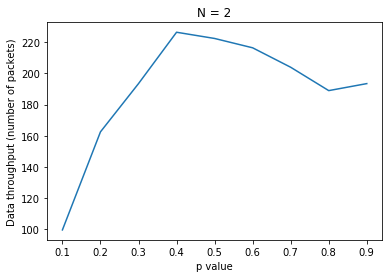

In [12]:
N = 2
plt.plot(plots_data[N]['x'], plots_data[N]['y'])
plt.xlabel('p value')
plt.ylabel("Data throughput (number of packets)")
plt.title('N = '+ str(N))

Text(0.5, 1.0, 'N = 5')

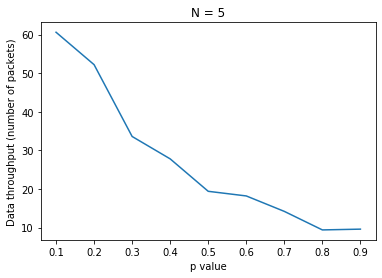

In [13]:
N = 5
plt.plot(plots_data[N]['x'], plots_data[N]['y'])
plt.xlabel('p value')
plt.ylabel("Data throughput (number of packets)")
plt.title('N = '+ str(N))

Text(0.5, 1.0, 'N = 10')

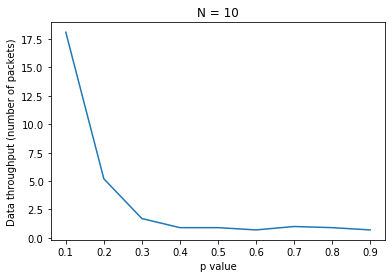

In [14]:
N = 10
plt.plot(plots_data[N]['x'], plots_data[N]['y'])
plt.xlabel('p value')
plt.ylabel("Data throughput (number of packets)")
plt.title('N = '+ str(N))